In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/MLCS/world-happiness-report-2021.csv')

In [ ]:
df_data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
# 2 จากข้อมูลดังกล่าว ให้สร้าง column ใหม่ โดยค่าของ column ใหม่ คำนวนตามคะแนนความสุข (life ladder) (10 คะแนน)
# ดังนี้

# กลุ่มไม่มีความสุข (unhappiness) คือกลุ่มที่มีคะแนน life ladderอยู่ใน quatile ที่ 1
# กลุ่มมีความสุขปานกลาง (middle) คือกลุ่มที่มีคะแนน life ladderอยู่ใน quatile ที่ 2 และ 3
# กลุ่มมีความสุขมาก (้happiest) คือกลุ่มที่มีคะแนน life ladderอยู่ใน quatile ที่ 4

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df_data = df_data.fillna(method="ffill",)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
pd.qcut(df_data["Ladder score"],q=4,)

0                   (6.255, 7.842]
1                   (6.255, 7.842]
2                   (6.255, 7.842]
3                   (6.255, 7.842]
4                   (6.255, 7.842]
                  ...             
144    (2.5220000000000002, 4.852]
145    (2.5220000000000002, 4.852]
146    (2.5220000000000002, 4.852]
147    (2.5220000000000002, 4.852]
148    (2.5220000000000002, 4.852]
Name: Ladder score, Length: 149, dtype: category
Categories (4, interval[float64, right]): [(2.5220000000000002, 4.852] < (4.852, 5.534] < (5.534, 6.255] <
                                           (6.255, 7.842]]

In [ ]:
columns  = ['unhappiness', 'middle', 'happiest']
df_data["life ladder"] = pd.qcut(df_data["Ladder score"]
                           , q=[0, 1/4, 2/4, 1]
                           , labels = columns)

df_data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,life ladder
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,happiest
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,happiest
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,happiest
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,happiest
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,happiest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,unhappiness
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,unhappiness
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,unhappiness
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,unhappiness


In [ ]:
df_data["life ladder"].describe()

count          149
unique           3
top       happiest
freq            74
Name: life ladder, dtype: object

In [ ]:
# 3 ให้ใช้หลักการของการทำ Clustering มาอธิบายถึงลักษณะของประเทศที่มีไม่มีความสุข (10 คะแนน)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

In [ ]:
df_dataunhap = df_data[df_data["life ladder"] == "unhappiness"]

In [ ]:
df_dataunhap.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,life ladder
111,Gabon,Sub-Saharan Africa,4.852,0.075,4.998,4.706,9.603,0.776,59.962,0.731,...,0.840,2.43,1.037,0.707,0.362,0.424,0.058,0.064,2.201,unhappiness
112,Burkina Faso,Sub-Saharan Africa,4.834,0.081,4.993,4.675,7.678,0.672,54.151,0.695,...,0.748,2.43,0.364,0.472,0.179,0.381,0.182,0.122,3.133,unhappiness
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,...,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148,unhappiness
114,Mozambique,Sub-Saharan Africa,4.794,0.103,4.997,4.592,7.158,0.744,54.706,0.882,...,0.684,2.43,0.183,0.634,0.196,0.608,0.228,0.163,2.783,unhappiness
115,Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,...,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736,unhappiness


In [ ]:
X1 = df_dataunhap[['Logged GDP per capita' , 'Social support' ,'Freedom to make life choices']].iloc[: , :].values

In [ ]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



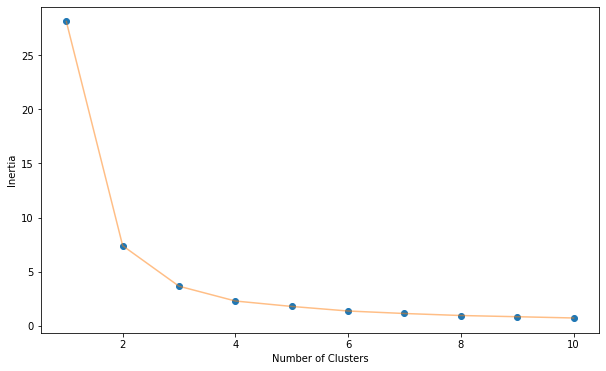

In [ ]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Number of Clusters = 3

In [ ]:
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(X1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# labels

In [ ]:
# 'Healthy life expectancy' , 'Social support' ,'Freedom to make life choices'

df_dataunhap['label'] =  labels
trace1 = go.Scatter3d(
    x= df_dataunhap['Logged GDP per capita'],
    # x= df_dataunhap['Healthy life expectancy'],
    y= df_dataunhap['Social support'],
    z= df_dataunhap['Freedom to make life choices'],
    mode='markers',
     marker=dict(
        color = df_dataunhap['label'],
        size= 20,
        line=dict(
            color= df_dataunhap['label'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    width=640,
    height=640,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Logged GDP per capita'),
            # xaxis = dict(title  = 'Healthy life expectancy'),
            yaxis = dict(title  = 'Social support'),
            zaxis = dict(title  = 'Freedom to make life choices')
        )
)
fig = go.Figure(data=data, layout=layout)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
  '''))

In [ ]:
configure_plotly_browser_state()
py.offline.iplot(fig)

In [ ]:
# สรุป ลักษณะของประเทศที่มีไม่มีความสุข
# 1.กลุ่มสีน้ำเงิน คะแนนสวัสดิการสังคมน้อย GPD น้อย มีอิสระการใช้ชีวิตปานกลาง

# 2.กลุ่มสีแดง คะแนนสวัสดิการสังคมปานกลาง GDP ปานกลาง มีอิสระการใช้ชีวิตปานกลาง

# 3.กลุ่มสีเหลือง คะแนนสวัสดิการสังคมสูง GDP สูง มีอิสระการใช้ชีวิตปานกลาง

In [ ]:
# 4 ให้ใช้หลักการของการทำ classification มาอธิบายถึงลักษณะของประเทศที่มีความสุขมาก (10 คะแนน)

In [ ]:
df_datahappi = df_data[df_data["life ladder"] == "happiest"]

In [ ]:
df_datahappi.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,life ladder
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,happiest
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,happiest
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,happiest
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,happiest
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,happiest


In [ ]:
X2 = df_datahappi[['Logged GDP per capita' , 'Social support' ,'Freedom to make life choices']].iloc[: , :].values

In [ ]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



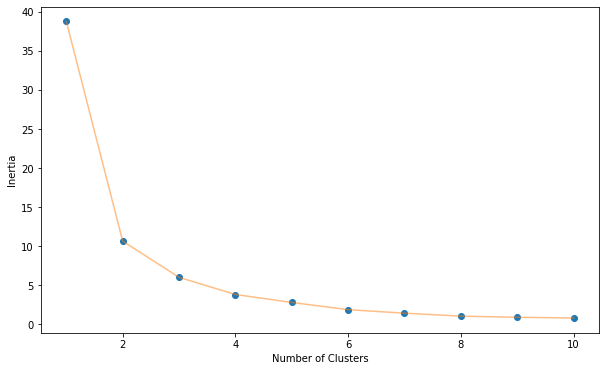

In [ ]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=200,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(X2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# labels

In [ ]:
configure_plotly_browser_state()
py.offline.iplot(fig)

In [ ]:
# สรุป ลักษณะของประเทศที่มีความสุขมาก
# 1.กลุ่มสีน้ำเงิน คะแนนสวัสดิการสังคมปานกลาง GPD ปานกลาง มีอิสระการใช้ชีวิตปานกลาง

# 2.กลุ่มสีแดง คะแนนสวัสดิการสังคมสูง GDP สูง มีอิสระการใช้ชีวิตปานกลาง

# 3.กลุ่มสีเหลือง คะแนนสวัสดิการสังคมสูงมาก GDP สูงมาก มีอิสระการใช้ชีวิตปานกลาง

# 5 ให้ว่า ประเทศ ในไฟล์ world-happiness-test.csv มีคะแนนความสุขเป็นอย่างไร (10 คะแนน)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/MLCS/world-happiness-report-2021.csv')
df2.head()

In [ ]:
data_columns = ['Country name' , 'Regional indicator' , 'Ladder score', 'Logged GDP per capita', 'Social support' ,  'Healthy life expectancy' , 'Freedom to make life choices' , 'Generosity' , 'Perceptions of corruption']

In [ ]:
df = df[data_columns].copy()

In [ ]:
from matplotlib import axes
happy_df = df.rename({'Country name' : 'country_name' , 'Regional indicator' : 'regional_indicator' , 'Ladder score' : 'ladder_score' , 'Logged GDP per capita' : 'logged_GDP_per_capita' , 'Social support' : 'social_support' , 'Healthy life expectancy' : 'healthy_life_expectancy' , 'Freedom to make life choices' : 'freedom_to_make_life_choices' , 'Generosity' : 'generosity' , 'Perceptions of corruption' : 'perceptions_of_corruption' }, axis =1)

In [ ]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
ladder_score                    0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [ ]:
print(happy_df)

    country_name  regional_indicator  ladder_score  logged_GDP_per_capita  \
0        Finland      Western Europe         7.842                 10.775   
1        Denmark      Western Europe         7.620                 10.933   
2    Switzerland      Western Europe         7.571                 11.117   
3        Iceland      Western Europe         7.554                 10.878   
4    Netherlands      Western Europe         7.464                 10.932   
..           ...                 ...           ...                    ...   
144      Lesotho  Sub-Saharan Africa         3.512                  7.926   
145     Botswana  Sub-Saharan Africa         3.467                  9.782   
146       Rwanda  Sub-Saharan Africa         3.415                  7.676   
147     Zimbabwe  Sub-Saharan Africa         3.145                  7.943   
148  Afghanistan          South Asia         2.523                  7.695   

     social_support  healthy_life_expectancy  freedom_to_make_life_choices 

## Happiest Countries
What are the 20 happiest countries

In [ ]:
top_10 = happy_df.head(20)
bottom_10 = happy_df.tail(20)

Text(564.6704545454544, 0.5, 'Social support')

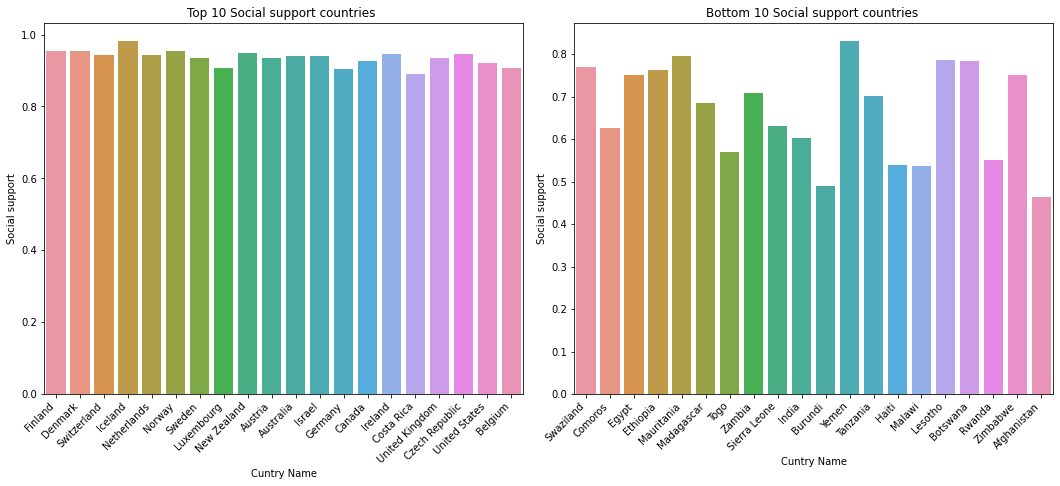

In [ ]:
fig, axes = plt.subplots(1,2, figsize= (15,6))
plt.tight_layout(pad=2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 Social support countries ')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top_10.country_name, y=top_10.social_support, ax=axes[0])

axes[0].set_xlabel('Cuntry Name')
axes[0].set_ylabel('Social support')

xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 Social support countries ')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= bottom_10.country_name, y=bottom_10.social_support, ax=axes[1])

axes[1].set_xlabel('Cuntry Name')
axes[1].set_ylabel('Social support')

In [ ]:
avg_happy = happy_df.groupby('regional_indicator')['ladder_score'].mean()

In [ ]:
avg_happy

regional_indicator
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: ladder_score, dtype: float64

In [ ]:
happy_df.groupby('ladder_score').agg(['mean', 'median'])

In [ ]:
happy_df.sort_values(by='regional_indicator', ascending=True)